In [1]:
from datalake_indexes_demo import DatalakeIndexesDemo
import pandas as pd

demo = DatalakeIndexesDemo("/Users/jannisbecktepe/Developer/db_config.json",
                           "gittables_demo")

___

<h1 align="center" style=font-size:52px>Demonstration of MATE and COCOA </h1>
<h1 align="center" style=font-size:22px></h1>

___

<p align="center">
  <img src="datalake_indexes_qr.png" width=400px/>
</p>

___

___

# 1) Input Preparation

___

## Reading the input dataset

___

In [ ]:
demo.read_input("../datasets/airlines_train_regression_1000000.arff", rows=100000)

___

## Selecting the query columns for the joinability discovery

___

In [ ]:
demo.set_query_columns(["UniqueCarrier", "Origin"])

___

## Select the target column for the downstream ML model

___

In [ ]:
demo.set_target_column("DepDelay")

___

# 2) Joinability Discovery

___

## Finding the top-10 joinable tables using the Super Key Index and MATE

___

In [ ]:
demo.joinability_discovery(verbose=True)

___

## Inspecting the joinability scores for the retrieved joinable tables

___

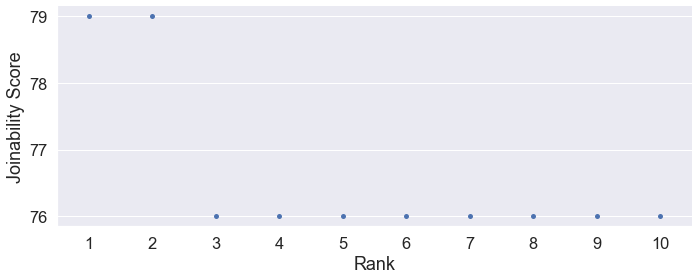

In [6]:
demo.plot_joinability_scores()

___

## Inspecting the joinable table with rank #1

___

In [12]:
demo.display_joinable_table(1)

Joinability score: 76 
Table ID: 233557 
#rows: 456 
#columns: 8 


,101 Dalmatians,1961,Clyde Geronimi,Rod Taylor,J. Pat O'Malley,Betty Lou Gerson,Martha Wentworth,Ben Wright
0,12 angry men,1957,sidney lumet,martin balsam,john fiedler,lee j cobb,e g marshall,jack klugman
1,2001 space odyssey,1968,stanley kubrick,keir dullea,gary lockwood,william sylvester,daniel richter,leonard rossiter
2,2012,2009,roland emmerich,john cusack,amanda peet,chiwetel ejiofor,thandie newton,oliver platt
3,3 idiots,2009,rajkumar hirani,aamir khan,kareena kapoor,madhavan,sharman joshi,boman irani
4,3 men baby,1987,leonard nimoy,tom selleck,steve guttenberg,ted danson,nancy travis,margaret colin


___

# 3) Duplicate Detection using XASH

___

## Discovering duplicate tables and their relationship within the joinable tables
___

In [ ]:
demo.duplicate_detection().show("nb.html")

___

## Removing duplicates within the top joinable tables

___

In [ ]:
demo.remove_duplicates()

___

# 4) Correlation Calculation

___

## Obtaining the top-10 correlating features using Order Index and COCOA Algorithm

___

In [7]:
demo.correlation_calculation()

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 286.33it/s]

--------------------------------------------
Runtime:
--------------------------------------------
Total runtime: 0.29s
Preparation runtime: 0.26s
Correlation calculation runtime: 0.04s

--------------------------------------------
Statistics:
--------------------------------------------
Evaluated features: 52
Max. correlation coefficient: -0.3083


___

## Inspecting the correlation coefficients for the retrieved features

___

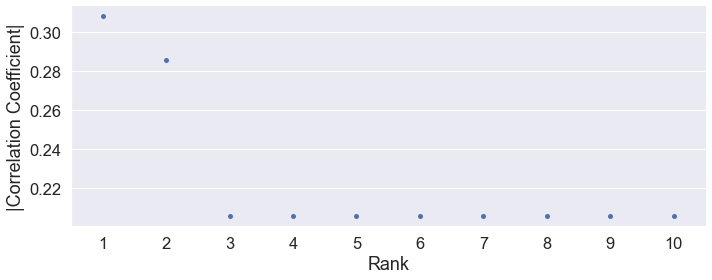

In [8]:
demo.plot_correlation_coefficients()

## Materializing join for the top 4 correlating features

In [9]:
demo.add_external_features(4)

,movie_title,duration,director_name,genres,imdb_score,913030_ID,686695_movieId,233557_1961,566400_1961
0,Avatar,178.0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,7.9,79,72998,2009,2009
1,Pirates of the Caribbean: At World's End,169.0,Gore Verbinski,Action|Adventure|Fantasy,7.1,70,53125,2007,2007
2,Spectre,148.0,Sam Mendes,Action|Adventure|Thriller,6.8,150,136020,nan,nan
3,The Dark Knight Rises,164.0,Christopher Nolan,Action|Thriller,8.5,nan,nan,2012,2012
4,Star Wars: Episode VII - The Force Awakens,nan,Doug Walker,Documentary,7.1,nan,nan,nan,nan


## Inspect differences between Spearman and Pearson correlation coefficients

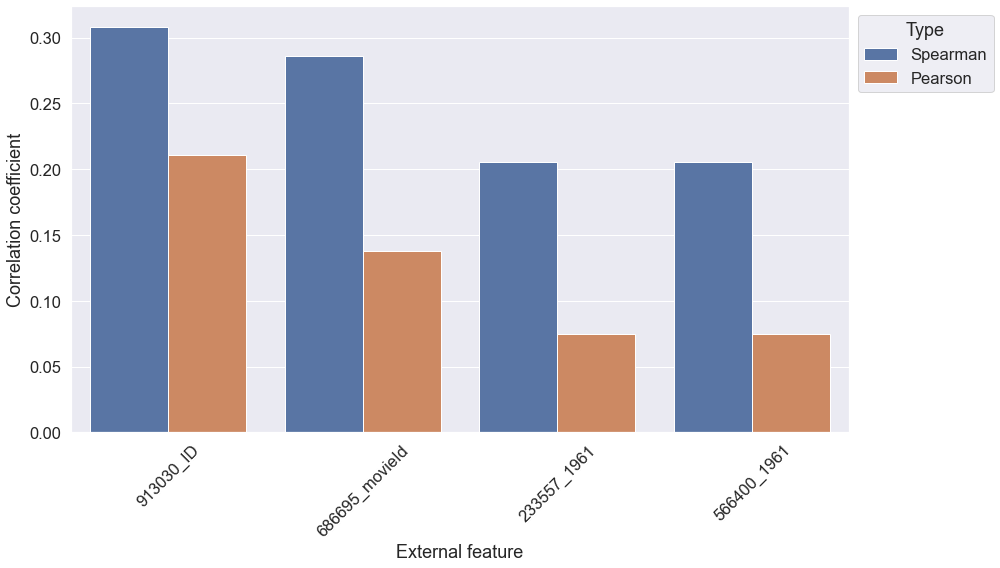

In [10]:
demo.plot_spearman_pearson()

## Inspect correlation between input and top-correlating features

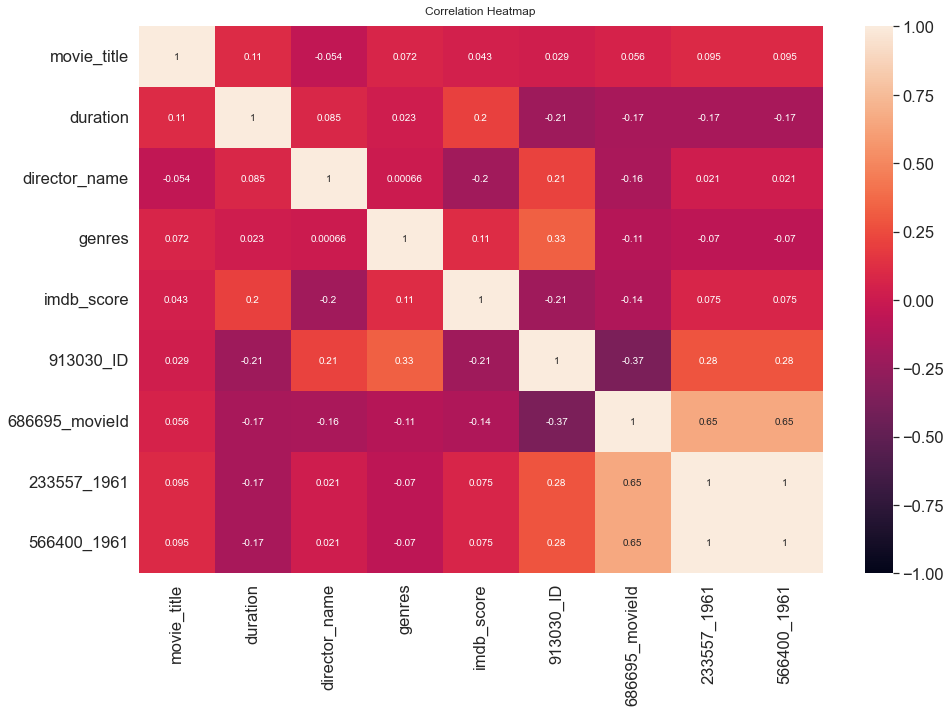

In [11]:
demo.plot_correlation_heatmap()

## Compare MSE of the model for the input and enriched datasets

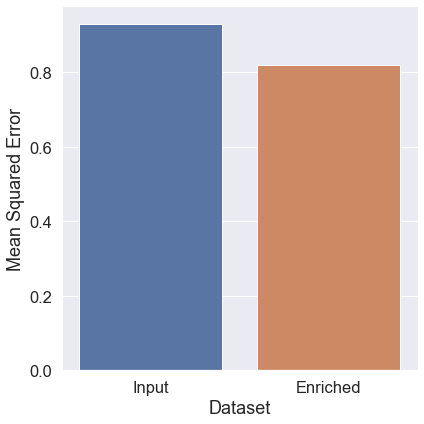

In [12]:
demo.fit_and_evaluate_model()